<a href="https://colab.research.google.com/github/SimGonsalves30/Wine-Quality-Prediction-/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd    # data analysis
import numpy as np     # used for working with arrays
import seaborn as sns  # data visualization
import matplotlib.pyplot as plt   # data visualization

In [ ]:
df = pd.read_csv('Wine.csv')   # loading the  data
df.head() 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fixed acidity,4898.0,6.854788,0.843868,3.80000,6.300000,6.80000,7.3000,14.20000
volatile acidity,4898.0,0.278241,0.100795,0.08000,0.210000,0.26000,0.3200,1.10000
citric acid,4898.0,0.334192,0.121020,0.00000,0.270000,0.32000,0.3900,1.66000
residual sugar,4898.0,6.391415,5.072058,0.60000,1.700000,5.20000,9.9000,65.80000
chlorides,4898.0,0.045772,0.021848,0.00900,0.036000,0.04300,0.0500,0.34600
free sulfur dioxide,4898.0,35.308085,17.007137,2.00000,23.000000,34.00000,46.0000,289.00000
total sulfur dioxide,4898.0,138.360657,42.498065,9.00000,108.000000,134.00000,167.0000,440.00000
density,4898.0,0.994027,0.002991,0.98711,0.991723,0.99374,0.9961,1.03898
pH,4898.0,3.188267,0.151001,2.72000,3.090000,3.18000,3.2800,3.82000
sulphates,4898.0,0.489847,0.114126,0.22000,0.410000,0.47000,0.5500,1.08000


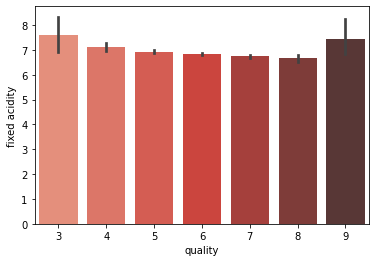

In [ ]:
sns.barplot(x = 'quality', y = 'fixed acidity', data = df,palette='Reds_d')

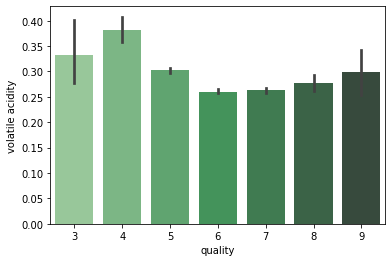

In [ ]:
sns.barplot(x = 'quality', y = 'volatile acidity', data = df,palette='Greens_d')

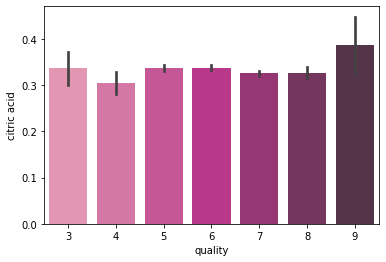

In [ ]:
sns.barplot(x = 'quality', y = 'citric acid', data = df,palette='RdPu_d')

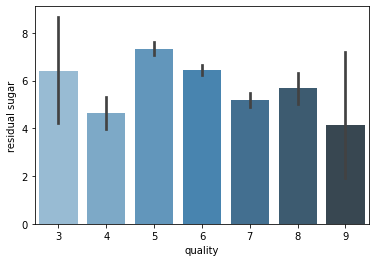

In [ ]:
sns.barplot(x = 'quality', y = 'residual sugar', data = df,palette='Blues_d')

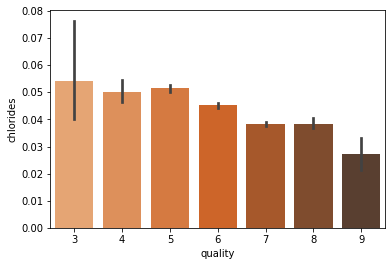

In [ ]:
sns.barplot(x = 'quality', y = 'chlorides', data = df,palette='Oranges_d')

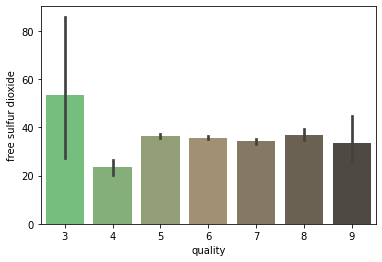

In [ ]:
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = df,palette='terrain_d')

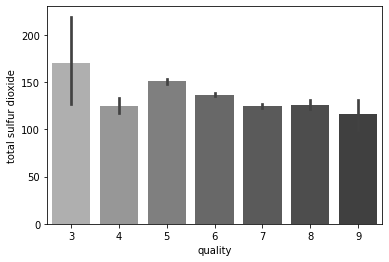

In [ ]:
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = df,palette='Greys_d')

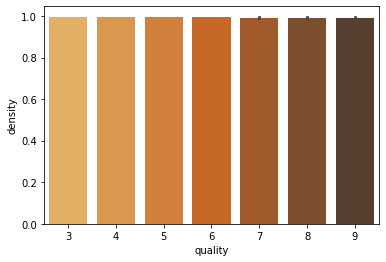

In [ ]:
sns.barplot(x = 'quality', y = 'density', data = df,palette='YlOrBr_d')

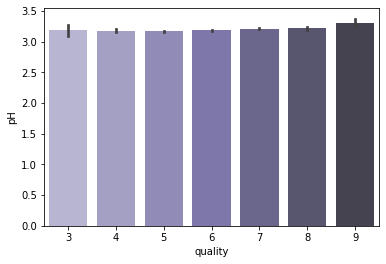

In [ ]:
sns.barplot(x = 'quality', y = 'pH', data = df,palette='Purples_d')


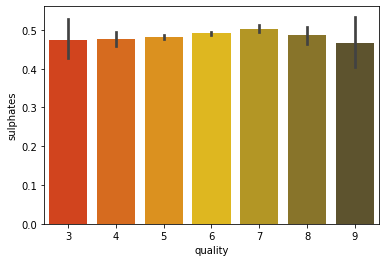

In [ ]:
sns.barplot(x = 'quality', y = 'sulphates', data = df,palette='hot_d')

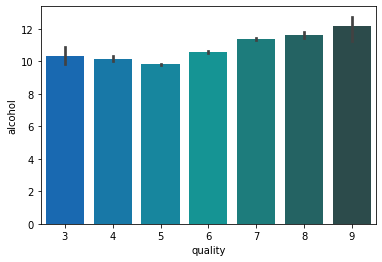

In [ ]:
sns.barplot(x = 'quality', y = 'alcohol', data = df,palette='winter_d')

In [ ]:
#Dividing the wine quality by good and bad by limits
bins=(2,6.5,9)
labels=['Bad','Good']
df['quality']=pd.cut(df['quality'],labels=labels,bins=bins)  

In [ ]:
df['quality'] = df['quality'].map({'Bad' : 0, 'Good' : 1})

In [ ]:
# Normalizing over the standard deviation
from sklearn.preprocessing import StandardScaler
Y = df.drop('quality', axis=1)
X =Y.values[:, 1:]
Clus_dataset = StandardScaler().fit_transform(X)

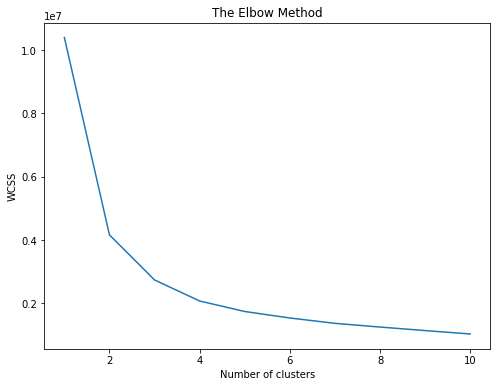

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300, n_init=12, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
f3, ax = plt.subplots(figsize=(8, 6))
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# build the model with the output from elbow method which is 2
clusterNum = 2
k_means =KMeans(init='k-means++', n_clusters=clusterNum, n_init=12)
k_means.fit(X)
labels = k_means.labels_
print(labels)


[1 0 0 ... 0 0 0]


In [ ]:
# We assign the labels to each row in dataframe.
Y['Clus_km'] = labels
print(Y.head())

print(Y.groupby('Clus_km').mean())

   fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  Clus_km
0            7.0              0.27         0.36  ...       0.45      8.8        1
1            6.3              0.30         0.34  ...       0.49      9.5        0
2            8.1              0.28         0.40  ...       0.44     10.1        0
3            7.2              0.23         0.32  ...       0.40      9.9        1
4            7.2              0.23         0.32  ...       0.40      9.9        1

[5 rows x 12 columns]
         fixed acidity  volatile acidity  ...  sulphates    alcohol
Clus_km                                   ...                      
0             6.784875          0.273166  ...   0.479282  10.961642
1             6.948093          0.285014  ...   0.503947   9.917199

[2 rows x 11 columns]


Text(0, 0.5, 'total sulfur dioxide')

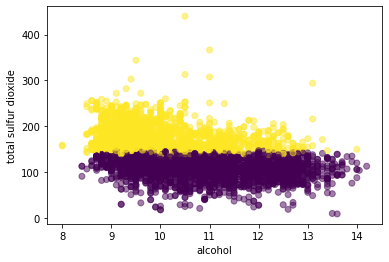

In [ ]:
# create 2 dimensional graph

plt.scatter(X[:, 9], X[:, 5], c=labels.astype(np.float), alpha=.5)
plt.xlabel('alcohol')
plt.ylabel('total sulfur dioxide')

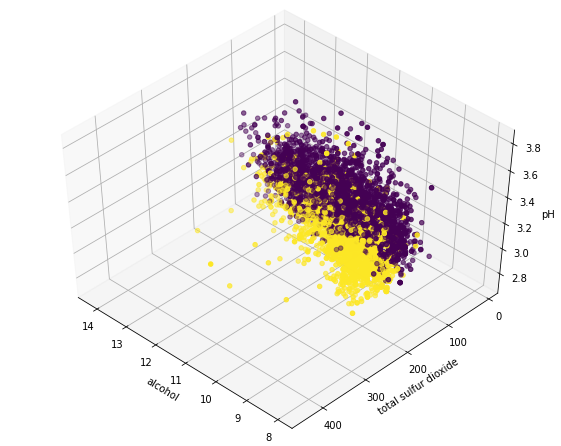

In [ ]:
# create 3 dimensional graph
from mpl_toolkits.mplot3d import Axes3D
f4 = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(f4, rect=[0, 0, .95, 1], elev=48, azim=134)
plt.cla()
ax.set_xlabel('alcohol')
ax.set_ylabel('total sulfur dioxide')
ax.set_zlabel('pH')
ax.scatter(X[:, 9], X[:, 5], X[:, 7], c= labels.astype(np.float))

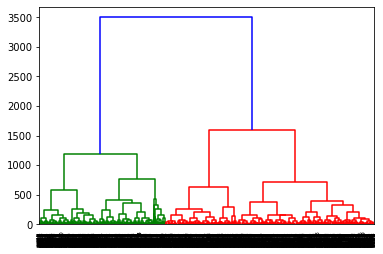

<Figure size 1152x720 with 0 Axes>

In [ ]:
from scipy.cluster.hierarchy import linkage,dendrogram

merg = linkage(df,method = 'ward')
dendrogram(merg, leaf_rotation = 90, leaf_font_size = 6)
plt.figure(figsize=(16,10))
plt.show()

In [ ]:
X = df.drop('quality', axis = 1)   # dropping the 'quality' column
y = df['quality']

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X)    # scale the training data and also learn the scaling parameters of that data. 
print(X_train)


[[ 1.72096961e-01 -8.17699008e-02  2.13280202e-01 ... -1.24692128e+00
  -3.49184257e-01 -1.39315246e+00]
 [-6.57501128e-01  2.15895632e-01  4.80011213e-02 ...  7.40028640e-01
   1.34184656e-03 -8.24275678e-01]
 [ 1.47575110e+00  1.74519434e-02  5.43838363e-01 ...  4.75101984e-01
  -4.36815783e-01 -3.36667007e-01]
 ...
 [-4.20473102e-01 -3.79435433e-01 -1.19159198e+00 ... -1.31315295e+00
  -2.61552731e-01 -9.05543789e-01]
 [-1.60561323e+00  1.16673788e-01 -2.82557040e-01 ...  1.00495530e+00
  -9.62604939e-01  1.85757201e+00]
 [-1.01304317e+00 -6.77100966e-01  3.78559282e-01 ...  4.75101984e-01
  -1.48839409e+00  1.04489089e+00]]


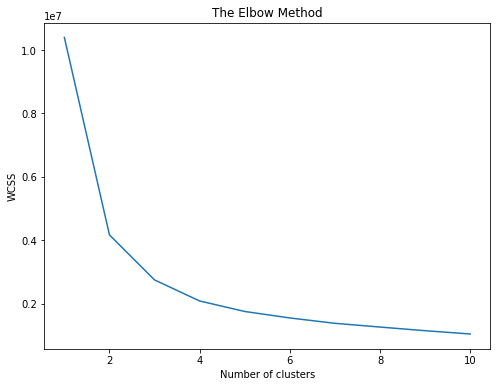

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300, n_init=12, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
f3, ax = plt.subplots(figsize=(8, 6))
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [ ]:
k_means =KMeans(init='k-means++', n_clusters=2, n_init=12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[0 1 1 ... 1 1 1]


In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0


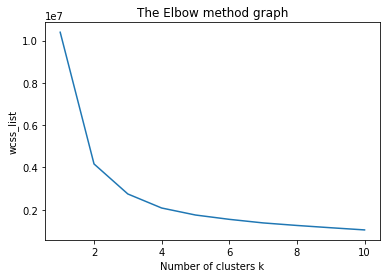

In [ ]:

wcss_list=[]

for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=42)
    kmeans.fit(X)
    wcss_list.append(kmeans.inertia_)
plt.plot(range(1,11),wcss_list)
plt.title('The Elbow method graph')
plt.xlabel('Number of clusters k')
plt.ylabel('wcss_list')
plt.show()

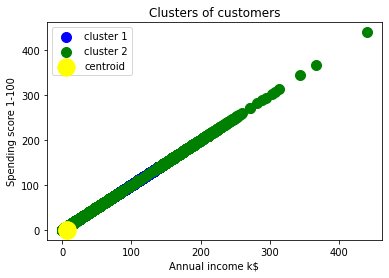

In [ ]:
kmeans=KMeans(n_clusters=2, init='k-means++',random_state=42)
y_predict=kmeans.fit_predict(X)

#visualizing the clusters
# y-predict ranges fro 0 low to 1 high for each clusters

plt.scatter(X[y_predict == 0],X[y_predict == 0],s=100,c='blue',label='cluster 1')
plt.scatter(X[y_predict == 1],X[y_predict == 1],s=100,c='green',label='cluster 2')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='centroid')
plt.title('Clusters of customers')
plt.xlabel('Annual income k$')
plt.ylabel('Spending score 1-100')
plt.legend()
plt.show()
